# **Project Name-** AirBnb Bookings Analysis

#### **Project type**- EDA
#### **Contribution**- Individual
#### **Submitter/Presenter**- Abhay Awasthi





# **Project** **Summary-**

This is Exploratory Data Analysis project titled as AirBnb Bookings Analysis.As the name suggests the current project deals with a huge dataset containing over 48000 observations and 16 different columns with both categorical and numerical data being present. AirBnb is a company which works as an online marketplace for people to get lodging for short or long term. It has revamped the whole tourism industry.There are several millions of listing on the website on various locations across the world which generates a ton of data which can be analysed to take a deeper look into people's behaviour on the website, expand the current sales, implement new services etc.We, in this project, will be looking to explore and deeply analyse the data to unlock useful insights and develop important understanding of the same.

# **Know your Data**

In [1]:
#First of all let us import all the important librarires needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
#helps display matplotlib plots inline and save them in notebook



In [2]:
#let us now import the csv file onto our notebook
#mount the google drive and use the read_csv function of pandas to import the csv file in the notebook
df=pd.read_csv('/content/drive/MyDrive/Airbnb NYC 2019.csv')

In [29]:
df.head(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [30]:
df.tail(6)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,NaN,NaN,2,163
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [31]:
#now we can look at some basic info of our dataset,gives us the idea of no of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [32]:
#we can look at statistical summary of numerical columns in our dataframe
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# **Understanding Your Variables**

* **id**: listing ID
* **name**: name of the listing
* **host_id**: host ID
* **host_name**: name of the host
* **neighbourhood_group**: location
* **neighbourhood**: area
* **latitude**: latitude coordinates
* **longitude**: longitude coordinates
* **room_type**: listing space type
* **price**: price in dollars
* **minimum_nights**: amount of nights minimum
* **number_of_reviews**: number of reviews
* **last_review**: latest review
* **reviews_per_month**: number of reviews per month
* **calculated_host_listings_count**: amount of listing per host
* **availability_365**: number of days when listing is available for booking

# **Data Wrangling**

In [3]:
#after looking at our dataset and its info now it is time to make this dataset ready for analysis

#let us first begin by only keeping those columns which are necessary and get rid of column that contain personal info/ not in our interest

#we don't need the name of the host, the id and the date of last review

#to do this we can use drop method

df=df.drop(['host_name','id','last_review'],axis=1)
df.head(6)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [34]:
#let us look for NaN or missing values in our dataset

df.isna().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
#to get rid of null values in reviews per month we can assign a value zero to it

df=df.fillna({'reviews_per_month':0})

In [36]:
df.isna().sum()

name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [37]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#here we can see we have min price as 0 , we want proper data with prices higher than 0 for properties
df=df[df.loc[:,'price']>0]

In [39]:
#let us now re-examine it
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000
mean,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.090800,7.144628,112.779498
std,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.597213,32.956185,131.627271
min,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
#we also want those properties which are available for atleast a day
df=df[df.loc[:,'availability_365']>0]

In [41]:
df.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.135400e+04,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000,31354.000000
mean,8.145071e+07,40.728406,-73.948753,162.091822,8.338426,31.849365,1.509464,10.335460,175.834439
std,8.673941e+07,0.056562,0.051400,254.444750,23.838961,51.638559,1.781202,40.705488,126.195374
min,2.571000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,8.619004e+06,40.688392,-73.983280,70.000000,2.000000,2.000000,0.170000,1.000000,55.000000
50%,4.108975e+07,40.723725,-73.954115,112.000000,3.000000,10.000000,0.920000,1.000000,168.000000
75%,1.452368e+08,40.763037,-73.930152,189.000000,5.000000,39.000000,2.340000,3.000000,305.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
df=df.reset_index()

In [17]:
#cleaning,filterning and manipulating is finished
#time to draw analysic and visualise the data in detail now



# **Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

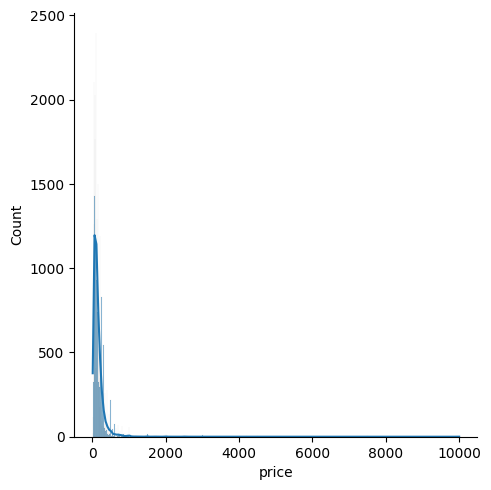

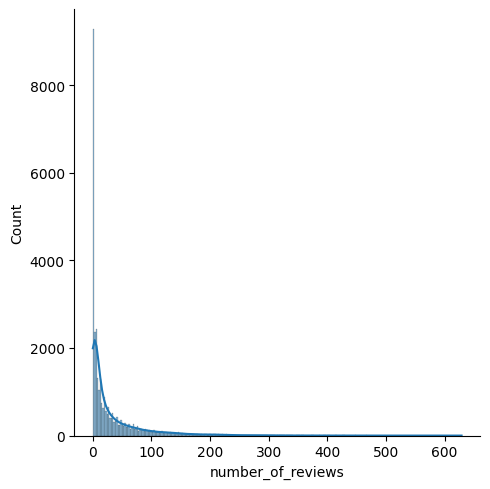

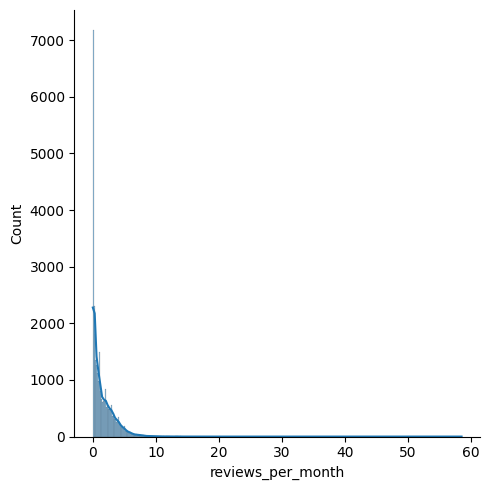

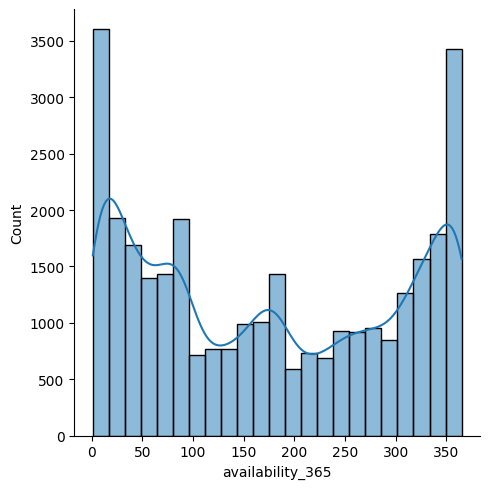

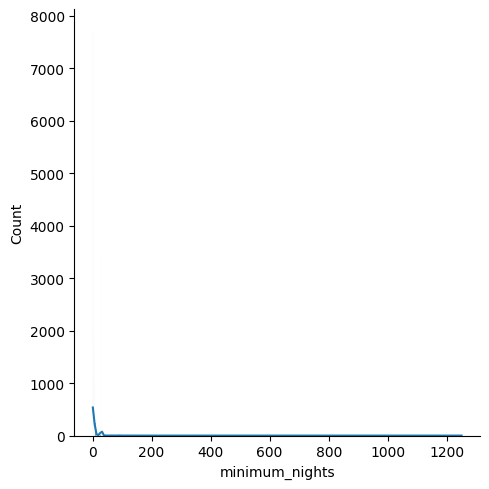

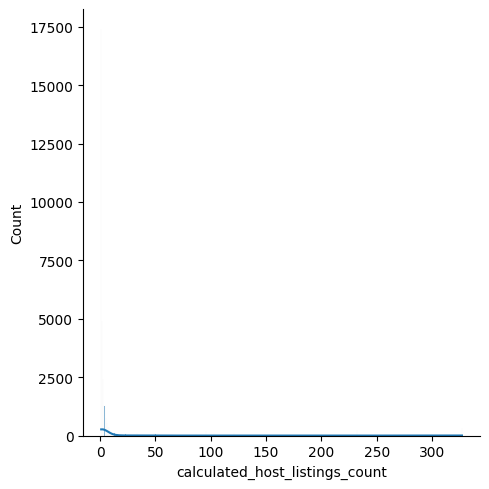

In [47]:
#first of all let us create a histogram for various columns to get an idea of the frequency of different values
#for this we can use displot of seaborn
#we can also use hist of pyplot

sns.displot(df['price'],kde=True)
sns.displot(df['number_of_reviews'],kde=True)
sns.displot(df['reviews_per_month'],kde=True)
sns.displot(df['availability_365'],kde=True)
sns.displot(df['minimum_nights'],kde=True)
sns.displot(df['calculated_host_listings_count'],kde=True)

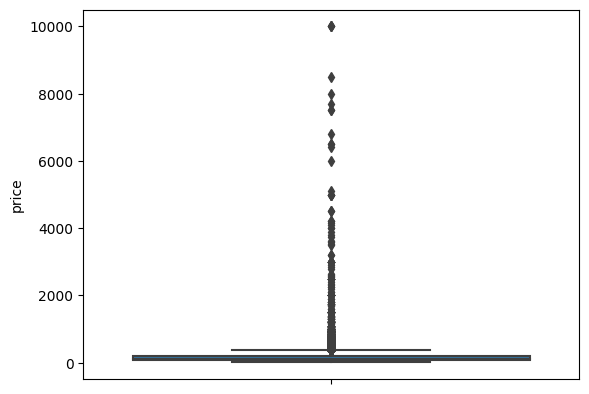

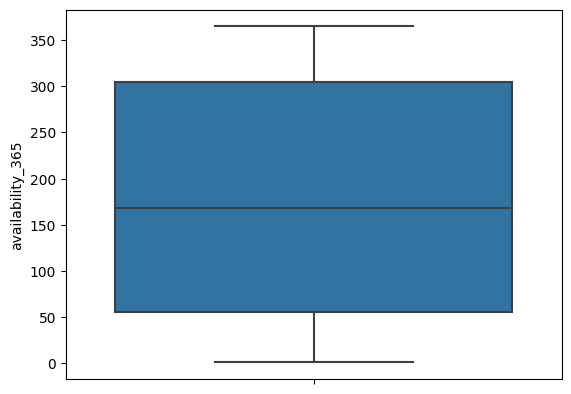

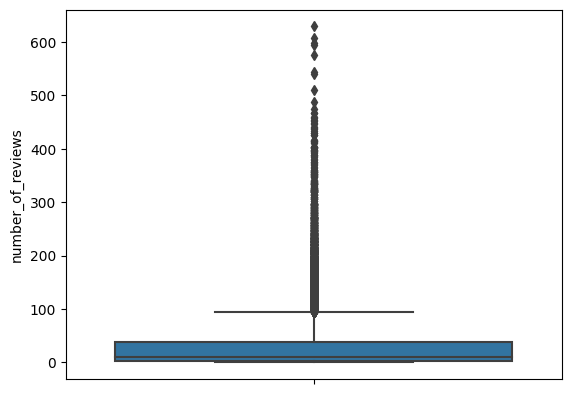

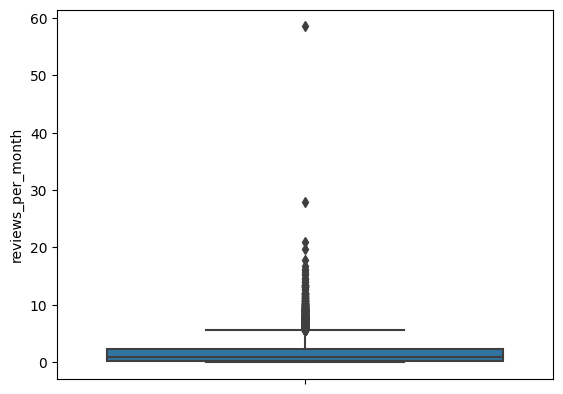

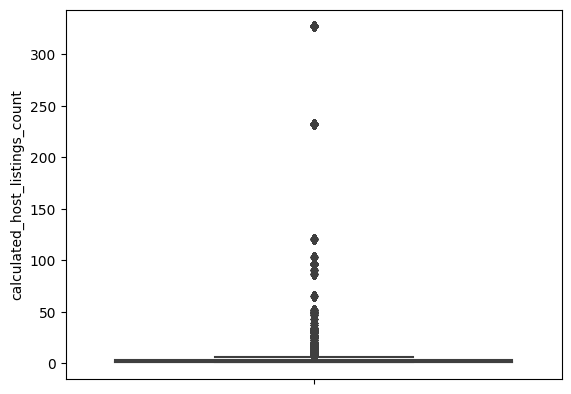

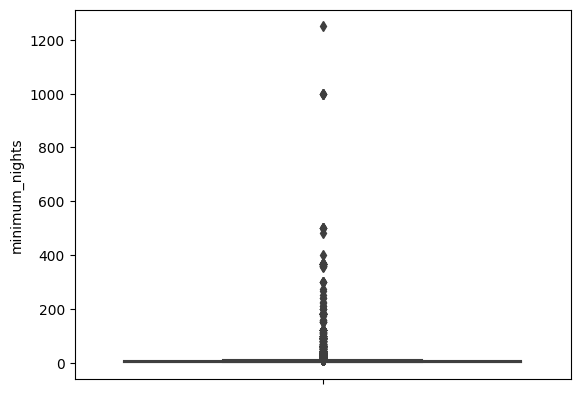

In [63]:
#to carry out the numerical analysis such as skewness of various features such as prices, availability etc we will use box plot
plt.figure()
sns.boxplot(y=df['price'])
plt.figure()
sns.boxplot(y=df['availability_365'])
plt.figure()
sns.boxplot(y=df['number_of_reviews'])
plt.figure()
sns.boxplot(y=df['reviews_per_month'])
plt.figure()
sns.boxplot(y=df['calculated_host_listings_count'])
plt.figure()
sns.boxplot(y=df['minimum_nights'])
plt.show()


we can see in the most of the above figures that median lies close to lower part
thus indicating that the features are mostly right skewed

<ipython-input-23-bd93fff10deb>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='crest',square=True,annot=True,vmin=-1)


<Axes: >

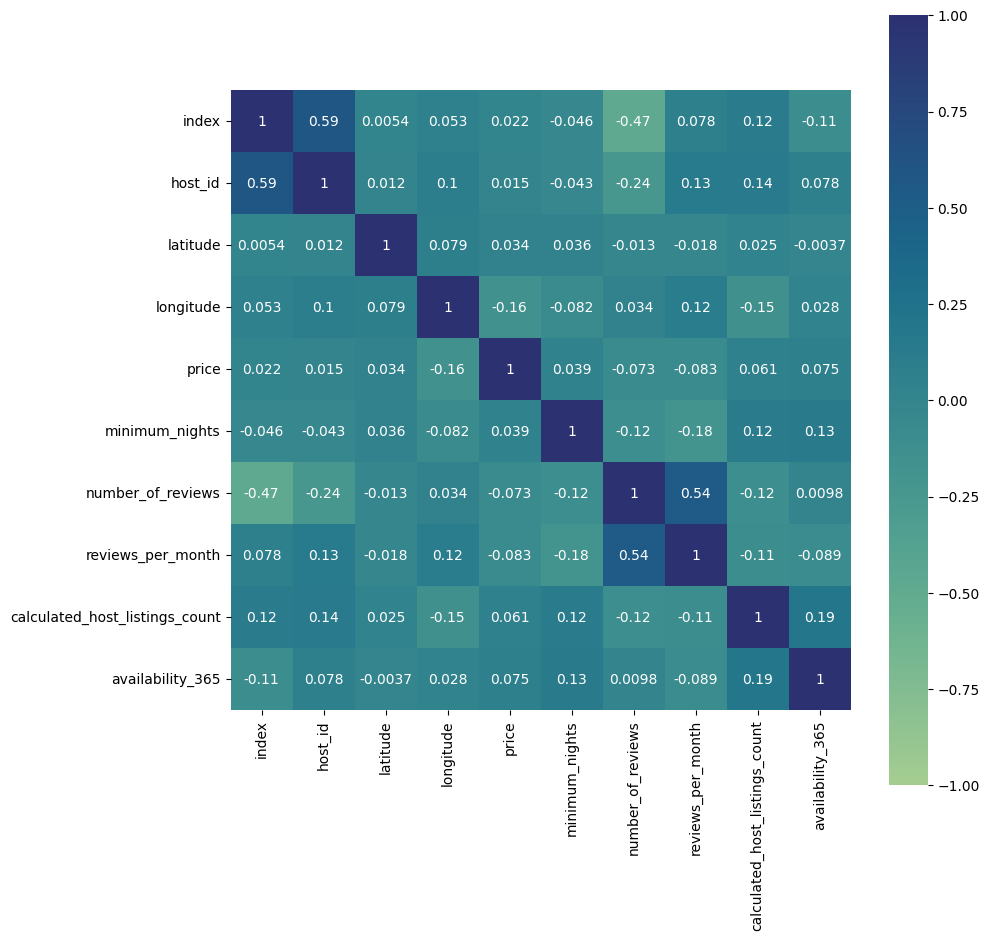

In [23]:
#To look at a general correlation betweeen various columns we can make a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='crest',square=True,annot=True,vmin=-1)

In [66]:
#let us see the distribution of properties in different neighbourhoods
df['neighbourhood_group'].value_counts()

Manhattan        13559
Brooklyn         12253
Queens            4298
Bronx              913
Staten Island      331
Name: neighbourhood_group, dtype: int64

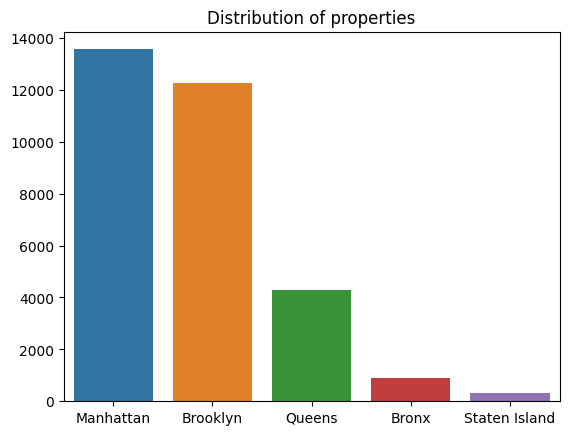

In [78]:
#we can use count/bar plot to represent the same

counting=df['neighbourhood_group'].value_counts()
sns.barplot(x=counting.index,y=counting.values)
plt.title("Distribution of properties")
plt.show()

here we can see that most of the properties are found in manhattan and brooklyn

In [74]:
#we can also dig deep to find out the types of properties listed on the website

count=df['room_type'].value_counts()
print(count)

Entire home/apt    16532
Private room       13960
Shared room          862
Name: room_type, dtype: int64


Text(0.5, 1.0, 'Types of properties')

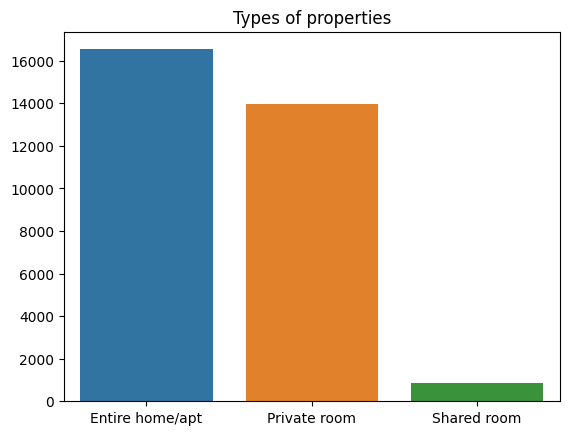

In [77]:
sns.barplot(x=count.index,y=count.values)
plt.title("Types of properties")

here we can see that most of the properties listed are entire home/apt or private rooms

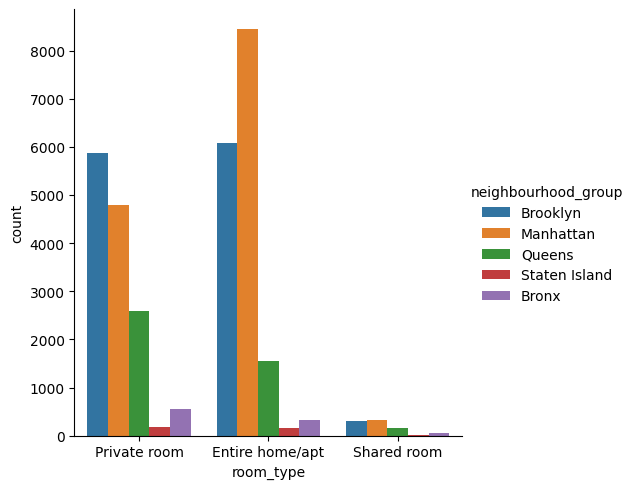

In [87]:
#we can find of room type neighbourhood wise

sns.catplot(data=df,x='room_type',hue='neighbourhood_group',kind='count')

In [88]:
#this is how the prices vary accross different neighbourhood
df.groupby(['neighbourhood_group'])['price'].describe()

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,,,,,,,,
Bronx,913.0,89.105148,112.676761,10.0,45.0,67.0,100.0,2500.0
Brooklyn,12253.0,132.928262,189.038301,10.0,64.0,99.0,150.0,8000.0
Manhattan,13559.0,214.202080,325.029426,10.0,99.0,151.0,240.0,10000.0
Queens,4298.0,100.029781,108.584467,10.0,50.0,75.0,115.0,2600.0
Staten Island,331.0,114.229607,291.526508,13.0,50.0,75.0,107.5,5000.0


<Axes: xlabel='neighbourhood_group', ylabel='price'>

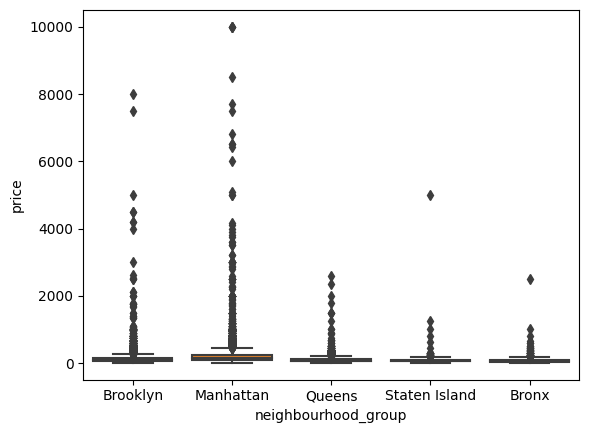

In [89]:
#we can make boxplot to represent the above information

sns.boxplot(x='neighbourhood_group',y='price',data=df)

<Axes: xlabel='neighbourhood_group', ylabel='price'>

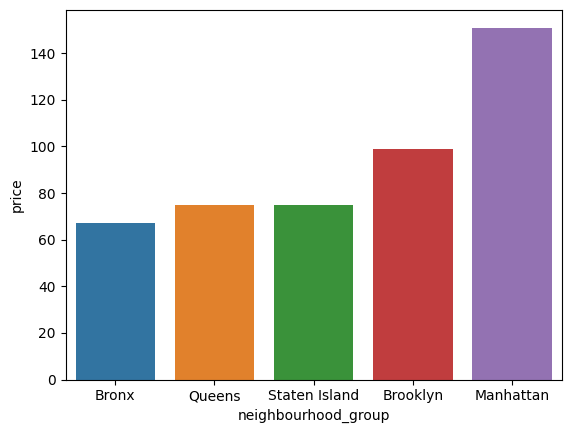

In [90]:
#we can now look at median prices of rooms in various neighbourhoods

med_df=df.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index().sort_values('price')

sns.barplot(data=med_df,x='neighbourhood_group',y='price')

here we can see that the properties in Manhatten are more expensive compared to other neighbourhoods

<Axes: xlabel='room_type', ylabel='price'>

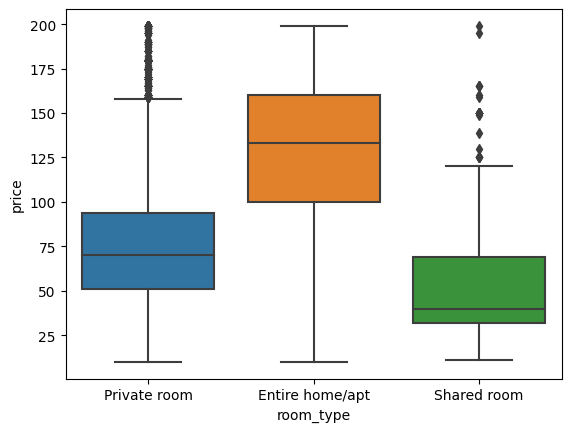

In [9]:
#we have seen in the displot of price that most of the listings on the website have prices around 200-250 dollars
#we can therfore see the box plot of properties under 200 dollars for various room types

under_df=df[df['price']<200]
sns.boxplot(data=under_df,x='room_type',y='price')

from the box plot it can be seen that the entire home/apt have a higher median price than the private and shared room

<Axes: xlabel='room_type', ylabel='price'>

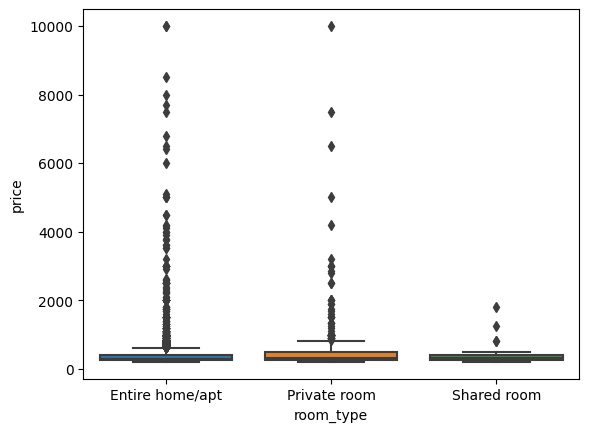

In [11]:
#similarly we can make graphs for prices higher than 200 dollars

over_df=df[df['price']>200]
sns.boxplot(data=over_df,x='room_type',y='price')

Text(0.5, 1.0, 'Location of listings')

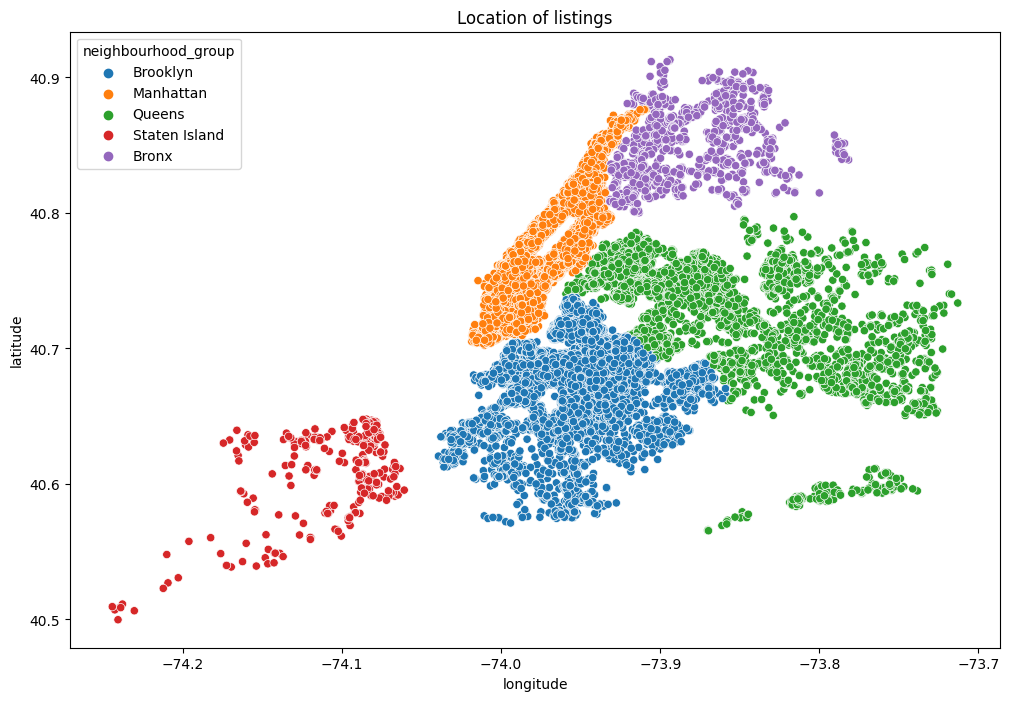

In [14]:
#we have been given location of listings too, we can map them too
#for that we can use the scatter plot

plt.figure(figsize=(12,8))
sns.scatterplot(x=df['longitude'],y=df['latitude'],hue=df['neighbourhood_group'])
plt.title("Location of listings")

Text(0.5, 1.0, 'Locations of various types of rooms')

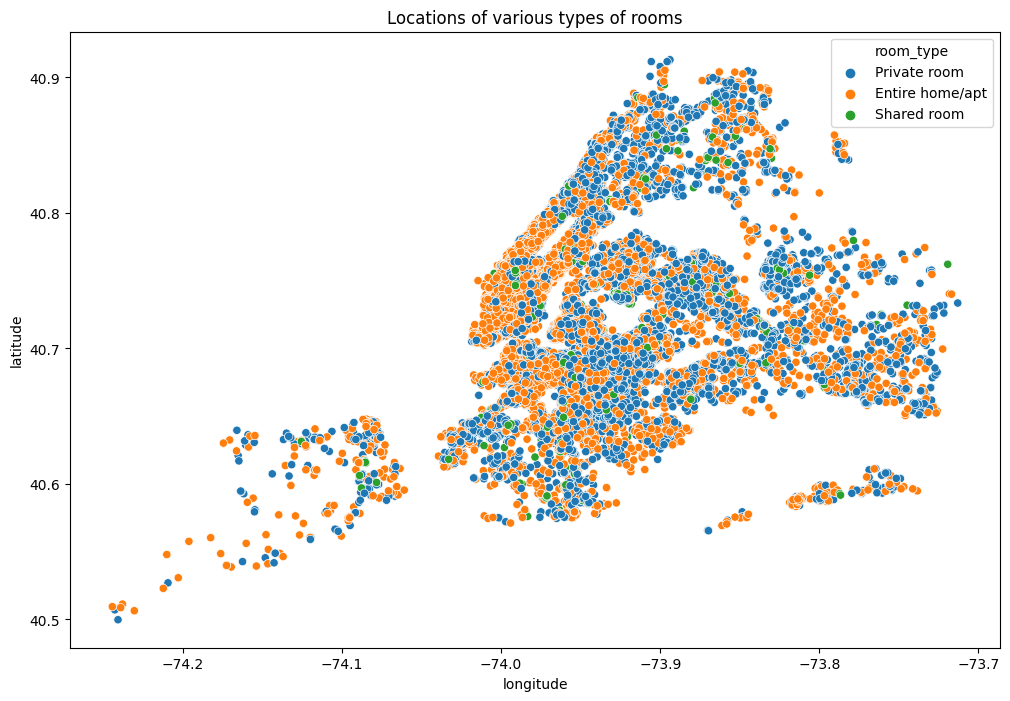

In [15]:
#similarly we can plot a scatter plot for room type in various locations
plt.figure(figsize=(12,8))
sns.scatterplot(x=df.longitude,y=df.latitude,hue=df.room_type)
plt.title("Locations of various types of rooms")

<Axes: xlabel='reviews_per_month', ylabel='price'>

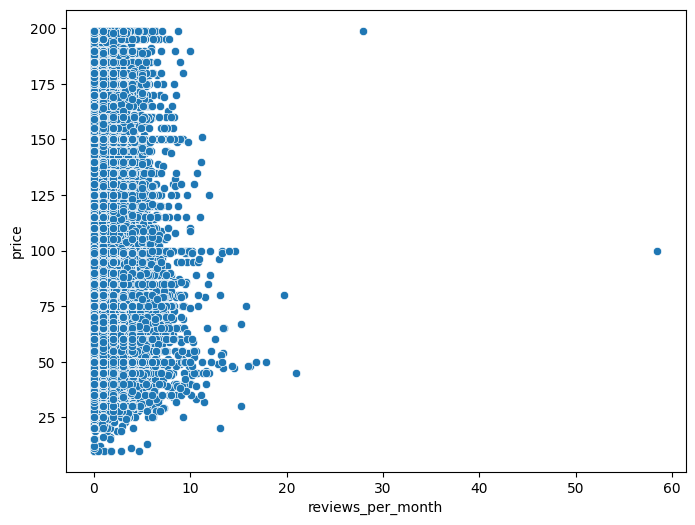

In [17]:
#we can also try to find relationship between no of reviews per month and price of the room

plt.figure(figsize=(8,6))
sns.scatterplot(x=under_df.reviews_per_month,y=under_df.price)
#this is for rooms under 200 dollars

<Axes: xlabel='reviews_per_month', ylabel='price'>

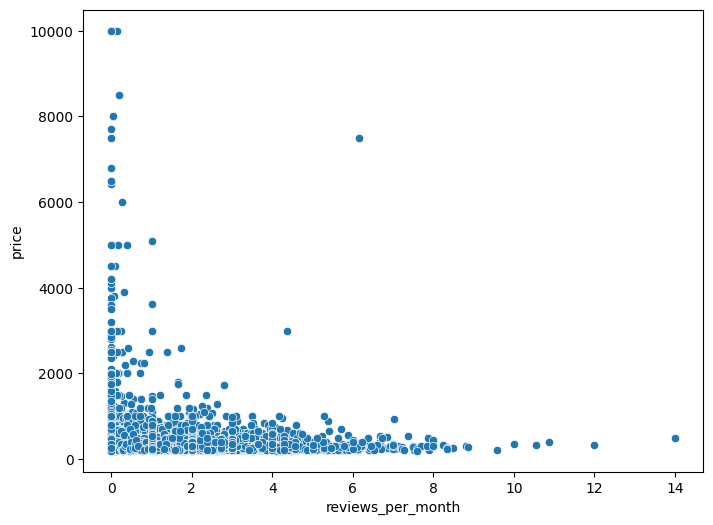

In [18]:
#for properties more than 200 dollars the relationship would look like the following

plt.figure(figsize=(8,6))
sns.scatterplot(x=over_df.reviews_per_month,y=over_df.price)

# **USEFULNESS OF DATA FROM BUSINESS PERSPECTIVE AND CONCLUSION**


*   The raw data that we had contained 48895 rows and 16 columns
*   We made a basic idea of no of occurence of various properties using the displot
*   Doing Numerical analysis and by using the boxplot to represent the same we found that the most of the properties of dataset such as price were right skewed
*   mean price of listings=$ 162, mean of availability=175 days
*   looking at the distribution of listings we found that most of the listings were in Manhattan(13559) and Brooklyn(12253)
*   In types of properties listed, two types came out to be on top viz. Entire room/apt(16532) and Private rooms(13960)

*   We also analysed the median price of properties listed in various neighbourhoods and found Manhattan to be the cosliest with median price being over $140 and Bronx being the cheapest at around 60-70 dollars

*   On fidling with the relationship between the types of rooms and their price we found that Entire home/apt were on an average had a higher median price than other types of rooms on the website
*   most of the properties listed on the website had a price of less than 200 dollars
*   All the above information establishes relationship between various properties in the dataset as well as help make decision before we venture into being one of the hosts on the website
*   An idea of what average prices could we expect in different localities for different types of room is what we get from this analysis












